<a href="https://colab.research.google.com/github/meetAmarAtGithub/CodeBase/blob/main/FinalExam_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="orange">**Section B**</font>

## 1. Using Collab Notebook implement any suitable deep learning model (except zero shot model) to classify the reviews into the following classes “Biology, Chemistry, Maths, Physics”. All these steps are expected in the code.
*  Import all modules 
*  Clean up and tokenise the data
*  Run the model and calculate validation accuracy after each epoch
*  Draw validation and train accuracy plots 







In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd "/content/gdrive/My Drive/Colab Notebooks/Reva/6_DeepLearning/FinalExam"

/content/gdrive/My Drive/Colab Notebooks/Reva/6_DeepLearning/FinalExam


In [4]:
import numpy as np
import pandas as pd
import string
import re
import nltk
from textblob import Word 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

#Tensorflow
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Version:  2.8.2
Eager mode:  True
Hub version:  0.12.0
GPU is NOT AVAILABLE


#<font color='blue'><b>Data Pre-Procesing</b></font>

In [8]:
df = pd.read_excel('Exam.xlsx')
df.head(5)

,question,subject
0,An anti-forest measure is\nA. Afforestation\nB...,Biology
1,"In recent year, there has been a growing\nconc...",Biology
2,Fern plants reproduce by\nA. Seeds\nB. Spores\...,Biology
3,The equation of the plane passing through the ...,Maths
4,What percent of Rs.150 is Rs.30?\nA . 5\%\nB. ...,Maths


In [9]:
#Look for Null data
df.isnull().sum()

question    0
subject     0
dtype: int64

In [10]:
#Shuffle data in dataset
df = df.sample(frac = 1)
df.head(10)

,question,subject
33410,A slender uniform rod of mass \( \mathrm{M} \)...,Physics
5055,Differentiate between.\nInspiration and expira...,Biology
19248,Why do food chains in an ecosystem do not have...,Biology
39294,The momentum acquired by all free electrons in...,Physics
40274,Explain why propanol has higher boiling point ...,Chemistry
371,"In Young's experiment with white light, the ce...",Physics
10422,Autotrophs and heterotrophs differ in\nA. How ...,Biology
28970,which an electron in hydrogen atom\njumps from...,Physics
16902,(a) A person cannot read newspaper placed near...,Physics
36504,Which of the following does not\nrepresent res...,Chemistry


In [11]:
# 52% of news are fake and 47.7% news is true
df['subject'].value_counts(normalize=True)

Physics      0.266802
Chemistry    0.263666
Biology      0.240357
Maths        0.229175
Name: subject, dtype: float64

In [15]:
df['question'] = df['question'].astype("string")

In [17]:
df= df.iloc[:1000]

### <font color="blue">**Remove Stopwords and Delimeter**</font>

In [18]:
def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


df['question'].apply(text_process)
df.head(5)

33410    [slender, uniform, rod, mass, mathrmM, length,...
5055              [Differentiate, Inspiration, expiration]
19248     [food, chains, ecosystem, 4, 5, trophic, levels]
39294    [momentum, acquired, free, electrons, wire, le...
40274    [Explain, propanol, higher, boiling, point, hy...
                               ...                        
40442    [Ichthyophis, belongs, Amphibia, B, Mollusca, ...
39632    [Bilaterally, symmetrical, organisms, include,...
36270    [boldsymbolP, fracboldsymbolK, boldsymbolM, bo...
27453    [highest, p, Kb, value, cdot, R3, N, Ð², R2, N...
39745    [longitudinal, section, root, starting, tip, g...
Name: question, Length: 1000, dtype: object

,question,subject
33410,A slender uniform rod of mass \( \mathrm{M} \)...,Physics
5055,Differentiate between. Inspiration and expirat...,Biology
19248,Why do food chains in an ecosystem do not have...,Biology
39294,The momentum acquired by all free electrons in...,Physics
40274,Explain why propanol has higher boiling point ...,Chemistry


### <font color="blue">**Lemmatization**</font>

In [22]:
lemmatizer = WordNetLemmatizer()
Lemmatized = df['question'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

### <font color="blue"> 1.Remove links from the dataset. <br> 2.Remove special characters or symbols from the dataset. <br> 3. Remove numbers or alphanumerical characters from the dataset.</font>

In [24]:
df['question'] = df['question'].str.replace(r'([\w\.-]+)@([\w\.-]+)',' ') #remove email addresses
df['question'] = df['question'].str.replace(r'[^\w\s]',' ') #remove punctuations and special chareters from dataset
df['question'] = df['question'].str.replace(r'(https|http)?:\/\/(\w|\.|\_|\/|\?|\=|\&|\%)*\b', ' ') # Remove links from the dataset.
df['question'] = df['question'].str.replace(r'[^\w]', ' ') #Remove not alphanumeric symbols white spaces

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


#<font color='brown'><b>Model creation and prediction</b></font><br>
## <font color="blue">Train-Test Split and perform the classification task using the Naive Bayes classification model. <br> </font>

In [33]:
d = {'Physics': 0, 'Chemistry': 1, 'Biology' : 2, 'Maths' : 3}
df['subject'] = df['subject'].map(d)
df.head(5)

,question,subject
33410,A slender uniform rod of mass mathrm M ...,0
5055,Differentiate between Inspiration and expirat...,2
19248,Why do food chains in an ecosystem do not have...,2
39294,The momentum acquired by all free electrons in...,0
40274,Explain why propanol has higher boiling point ...,1


In [34]:
x = df['question']
y = df['subject']

len(x), len(y)

(1000, 1000)

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

750 750
250 250


In [36]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)

In [37]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 50)                48190600  
                                                                 
 dense_2 (Dense)             (None, 16)                816       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [39]:
x_val = x_train[:500]
partial_x_train = x_train[501:]

y_val = y_train[:500]
partial_y_train = y_train[501:]

x_val.size
print()
partial_x_train.size
print()
y_val.size
print()
partial_y_train.size

500

249

500

249

In [40]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=3,
                    batch_size=500,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/3
1/1 [==============================] - 2s 2s/step - loss: 0.8233 - accuracy: 0.2570 - val_loss: 0.7918 - val_accuracy: 0.2340
Epoch 2/3
1/1 [==============================] - 1s 728ms/step - loss: 0.7725 - accuracy: 0.2771 - val_loss: 0.7496 - val_accuracy: 0.2340
Epoch 3/3
1/1 [==============================] - 1s 552ms/step - loss: 0.7232 - accuracy: 0.2972 - val_loss: 0.7085 - val_accuracy: 0.2420


In [41]:
results = model.evaluate(x_test, y_test)

print(results)

8/8 [==============================] - 1s 60ms/step - loss: 0.7114 - accuracy: 0.2800
[0.711442232131958, 0.2800000011920929]


### <font color="blue">**Model accuracy is - 28 %, this is because, I ran for few epochs.**</font>

In [42]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Training and validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

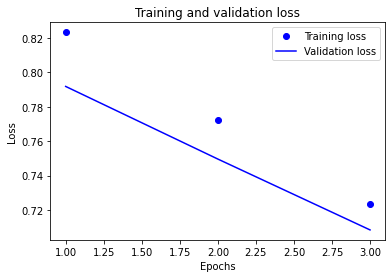

In [43]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Text(0.5, 1.0, 'Training and validation accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

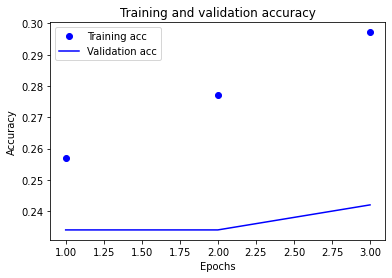

In [44]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Solve Question 1 Using a Zero Shot Model (Facebook BART Large MNLI or any other suitable zs model)


*   Take the “question” Column as input
*   To reduce the time taken you can run it on 500 entries 





In [45]:
# Transformers installation
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 5.1 MB/s 
     |████████████████████████████████| 6.6 MB 28.8 MB/s 
     |████████████████████████████████| 120 kB 40.3 MB/s 


In [46]:
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False 

import numpy as np
import pandas as pd
import string
!pip install text_hammer
import text_hammer as th
import seaborn as sns
import matplotlib.pyplot as plt
import re
from wordcloud import STOPWORDS
from collections import defaultdict
#%%time
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()
from transformers import AutoTokenizer,TFBertModel

max_len = 36

import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy,BinaryCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy,BinaryAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import Word 
from wordcloud import WordCloud

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 5.3 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


[]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### LOADING THE BERT MODEL:

In [47]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
bert = TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [48]:
train_data = df.iloc[:500]

len(train_data)

500

In [49]:
test_data  = df.iloc[501:len(df)]

len(test_data)

499

In [51]:
x_train = tokenizer(
    text=train_data.question.tolist(),
    add_special_tokens=True,
    max_length=36,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [52]:
x_train['input_ids'].shape
print()
x_train['attention_mask'].shape

TensorShape([500, 36])

TensorShape([500, 36])

In [54]:
y_train = train_data.subject.values
y_train.shape

(500,)

In [56]:
train_data.subject.value_counts()

0    139
2    127
1    118
3    116
Name: subject, dtype: int64

BUILDING THE MODEL ARCHITECTURE:

In [57]:
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
# embeddings = dbert_model(input_ids,attention_mask = input_mask)[0]


embeddings = bert(input_ids,attention_mask = input_mask)[1] #(0 is the last hidden states,1 means pooler_output)
# out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = tf.keras.layers.Dropout(0.1)(embeddings)

out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32,activation = 'relu')(out)

y = Dense(1,activation = 'sigmoid')(out)
    
model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

# for training bert our lr must be so small

In [58]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 36)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 36)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 36,                                            

In [59]:
optimizer = Adam(
    learning_rate=6e-06, # this learning rate is for bert model.
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)

# Set loss and metrics
loss = BinaryCrossentropy(from_logits = True)
metric = BinaryAccuracy('accuracy'),
# Compile the model
model.compile(
    optimizer = optimizer,
    loss = loss, 
    metrics = metric)

In [61]:
# Fit the model
final = model.fit(
    x ={'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']} ,
    y = y_train,
#   validation_split = 0.1,
  epochs=4,
    batch_size=10
)

Epoch 1/4
50/50 [==============================] - 247s 5s/step - loss: -0.5872 - accuracy: 0.2360
Epoch 2/4
50/50 [==============================] - 248s 5s/step - loss: -1.0161 - accuracy: 0.2640
Epoch 3/4
50/50 [==============================] - 246s 5s/step - loss: -1.4407 - accuracy: 0.3420
Epoch 4/4
50/50 [==============================] - 251s 5s/step - loss: -1.7905 - accuracy: 0.3940


### VISUALIZATION OF LOSS AND ACCURACY CURVE:

In [62]:
def visual_accuracy_and_loss(final):
    acc = final.history['accuracy']
    loss = final.history['loss']
    epochs_plot = np.arange(1, len(loss) + 1)
    plt.clf()
    plt.plot(epochs_plot, acc, 'r', label='Accuracy')
    plt.plot(epochs_plot, loss, 'b:', label='Loss')
    plt.title('VISUALIZATION OF LOSS AND ACCURACY CURVE')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

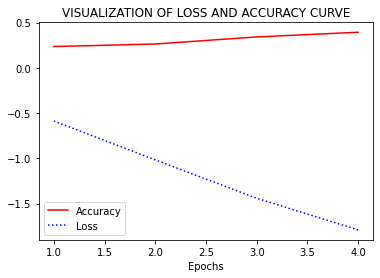

In [63]:
visual_accuracy_and_loss(final)

Text(0.5, 1.0, 'Accuracy Curve')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Loss Curve')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

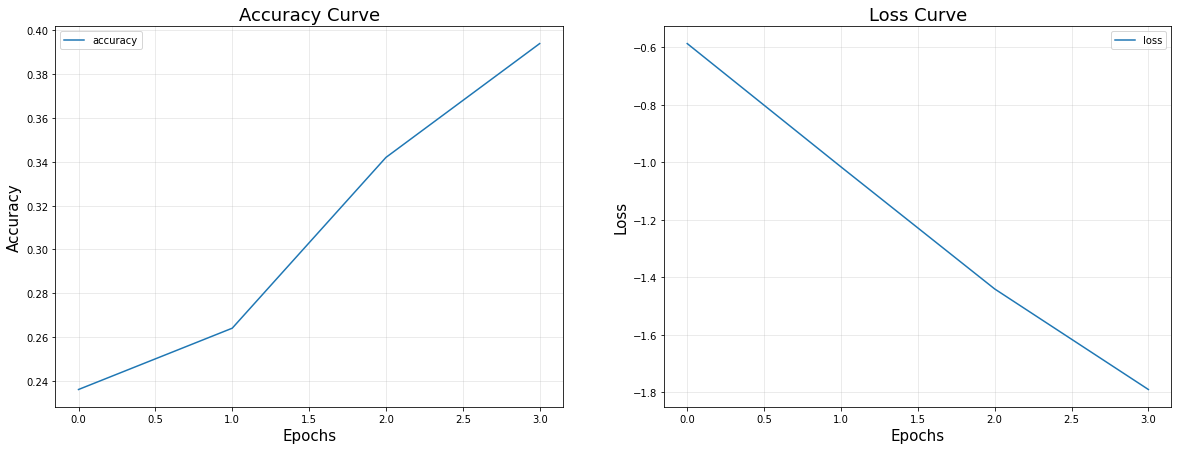

In [64]:
# Plot the loss and accuracy curves  

#Diffining Figure
f = plt.figure(figsize=(20,7))

#Adding Subplot 1 (For Accuracy)
f.add_subplot(121)

plt.plot(final.epoch,final.history['accuracy'],label = "accuracy") # Accuracy curve 


plt.title("Accuracy Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

#Adding Subplot 1 (For Loss)
f.add_subplot(122)

plt.plot(final.epoch,final.history['loss'],label="loss") # Loss curve 


plt.title("Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.show()

In [66]:
x_test = tokenizer(
    text=test_data.question.tolist(),
    add_special_tokens=True,
    max_length=36,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

### PREDICTION:

In [68]:
predicted = model.predict({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']})
y_predicted = np.where(predicted>0.5,1,0)
m = tf.keras.metrics.Accuracy()
m.update_state(test_data.subject.values, np.round(predicted,0))
print('Final result: ', m.result().numpy())

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=499.0>

Final result:  0.40480962


## Accuracy of the model is - 40.48%

# <font color="orange">**Section A**</font>

## <font color="blue">*1. Define Semantic Segmentation briefly. Mention any two of its applications.*</font>

It is the process of segmenting each pixel in an image within its region that has semantic value with a specific label. Semantic segmentation is a very authoritative technique for deep learning as it helps computer vision to easily analyze the images by assigning parts of the image semantic definitions.

However, semantic image segmentation is very much useful for deep learning that requires extra depth analysis of images while training through machine learning data. At the same time, it is also extremely difficult to carry out, as there are certain techniques that are used to create images with semantic segmentation.

Uses of semantic segmentation are - <br> 
**Region-Based Semantic Segmentation** - Region-based semantic segmentation is mainly used for segmentation that incorporates region extraction and semantic-based classification. In this type of segmentation, first of all, only free-form regions are selected by the model and then these regions are transformed into predictions at a pixel level to make sure each pixel is visible to computer vision.

A specific type of framework is used to complete this in the regions through the CNN framework, or R-CNN, that uses a specific search algorithm to drag many possible section proposals from an image.

**Fully Convolutional Network-Based Semantic Segmentation** - CNNs are mainly used for computer vision to perform tasks like image classification, face recognition, identifying and classifying everyday objects, and image processing in robots and autonomous vehicles. It is also used for video analysis and classification, semantic parsing, automatic caption generation, search query retrieval, sentence classification, and much more.

### <font color="blue">2. What is the importance of following while training a semantic segmentation model? (Sample Code shown below)

1.   “Conv2dTranspose” layer
2.   Stride =2

x = layers.Conv2DTranspose(256, 3, activation="relu", padding="same")(x)<br>
x = layers.Conv2DTranspose(256, 3, activation="relu", padding="same", strides=2)(x).</font>





First "Conv2DTranspose" function does not use any "Stride" and there is no padding. It is using activation function as "relu". <br><br> Second, "Conv2DTranspose" convolution function using a stride of 2, that means we are advancing the filter by two pixels at each step. Since we are taking larger steps, we will reach the end of the image in fewer steps. As a consequence, the resulting feature map will be smaller since the feature map directly depends on the number of steps we take. Rest of the configuration is same as previous step.


### <font color="blue">Import the VGG19 pre-trained model in Keras. Using “model.summary()” command answer the following <br> 

*   What is the total number of parameters
*   What is the number of max-pooling layers?
*   What is the number of Outputs in the last layer? </font>


In [70]:
from keras.applications.vgg19 import VGG19
model = VGG19()
print(model.summary())

574726144/574710816 [==============================] - 12s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

**VGG19 model has 138 million parameters.** <br>
**max pooling was performed over a 2 * 2 pixel windows with sride 2.**<br>
**Last layer output is  1 X 1000**

### <font color="blue">Q4. In a google collab notebook write python code to generate text starting with the following phrase “If we had an AI that could make jokes, would it be funny?”.</font>
### <font color="blue">Use “gpt3” or a similar model as the underlying model and any suitable tokenizer. Please ensure that at least 2 sentences are generated (Max 10 sentences)</font>


In [71]:
print("If we had an AI that could make jokes, would it be funny?")

If we had an AI that could make jokes, would it be funny?


In [72]:
!pip3 install gpt-2-simple

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for gpt-2-simple: filename=gpt_2_simple-0.8.1-py3-none-any.whl size=24576 sha256=eb5cf4a4894459ef81b62a4833c08c4a4b993b4ee76dcb81e61059d9c09cd0ce
  Stored in directory: /root/.cache/pip/wheels/d6/89/8a/f5de6944286d1ac2658b0caa7eae3c8cda50f770cdc957217f
Successfully built gpt-2-simple


In [ ]:
import gpt_2_simple as gpt2
import os
import requests

model_name = "124M"
if not os.path.isdir(os.path.join("models", model_name)):
	print(f"Downloading {model_name} model...")
	gpt2.download_gpt2(model_name=model_name)   # model is saved into current directory under /models/124M/


file_name = "shakespeare.txt"
if not os.path.isfile(file_name):
	url = "https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt"
	data = requests.get(url)

	with open(file_name, 'w') as f:
		f.write(data.text)


sess = gpt2.start_tf_sess()
gpt2.finetune(sess,
              file_name,
              model_name=model_name,
              steps=1000)   # steps is max number of training steps

gpt2.generate(sess)

Fetching checkpoint: 1.05Mit [00:00, 223Mit/s]                                                      
Fetching encoder.json: 1.05Mit [00:00, 4.12Mit/s]
Fetching hparams.json: 1.05Mit [00:00, 284Mit/s]                                                    
Fetching model.ckpt.data-00000-of-00001: 498Mit [00:14, 33.6Mit/s]
Fetching model.ckpt.index: 1.05Mit [00:00, 268Mit/s]                                                
Fetching model.ckpt.meta: 1.05Mit [00:00, 6.09Mit/s]
Fetching vocab.bpe: 1.05Mit [00:00, 5.70Mit/s]


1115394

Loading checkpoint models/124M/model.ckpt
Loading dataset...


100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


dataset has 338025 tokens
Training...
[1 | 140.04] loss=4.32 avg=4.32
[2 | 275.71] loss=4.00 avg=4.16
[3 | 405.13] loss=3.61 avg=3.98
[4 | 533.38] loss=3.68 avg=3.90
[5 | 661.98] loss=3.86 avg=3.89
[6 | 795.08] loss=3.59 avg=3.84
[7 | 921.82] loss=3.76 avg=3.83
interrupted
Saving checkpoint/run1/model-7
